##Training of the model


In [ ]:
# Libaries
import numpy as np
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch
import torch.optim as opt
from torch.utils.data import DataLoader
from torch import nn as nn
from Custom_models import REDCN1, vgg16, ResNet9
from Training_Func import training_cycle

##Gpu activation (if is any available )

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

##Load of datasets


In [ ]:
# data load
PATH = "./DATA.pth"
dataset = torch.load(PATH)
print(dataset)

{'train_dataloader': <torch.utils.data.dataloader.DataLoader object at 0x79c101497a90>, 'test_dataloader': <torch.utils.data.dataloader.DataLoader object at 0x79c101496dd0>, 'validation_dataloader': <torch.utils.data.dataloader.DataLoader object at 0x79c101497280>, 'classes': ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose

##Load of the network
para este caso se utilizo una resnet 9 la cual posee capas paralelas para asi poder procesar varias imagenes al mismo tiempo y luego unirlas en capas posteriores.


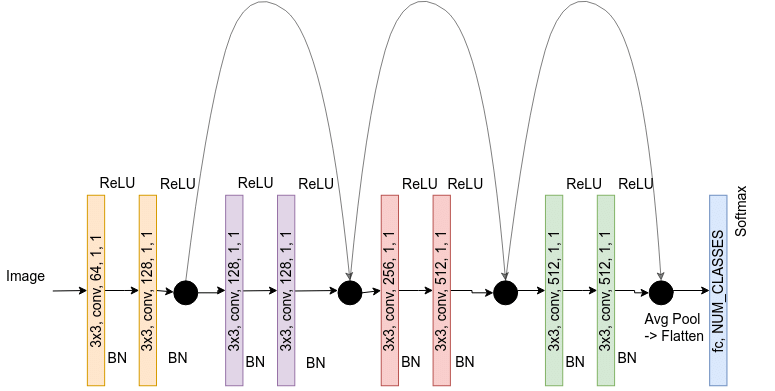




In [ ]:
# Model load
Resnet = ResNet9()
Resnet.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = opt.SGD(Resnet.parameters(), lr=0.001, momentum=0.9)
Resnet.eval()

ResNet9(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=Tr

##training cycle
para este caso se utiliza una funcion extener para poder tener acceso cuando sea necesario.




In [ ]:
# training cycle
training_time = 50
graphic1 = []
graphic2 = []
running_epoch = []
acc = []
class_total = []
class_correct = []

(
    graphic1,
    graphic2,
    running_epoch,
    acc,
    class_total,
    class_correct,
    test_loss,
) = training_cycle(Resnet, training_time, optimizer, criterion, dataset)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(



[Para la epoca 1 ] 
loss: 4.04764061126709

val_loss: 3.5202944275140764

Test Loss: 0.003245592493789832

Test Accuracy : 16.35% where 1635 of 10000 were predicted correctly

[Para la epoca 2 ] 
loss: 3.191585244679451

val_loss: 2.7967385146021844

Test Loss: 0.0018469183248782752

Test Accuracy : 28.42% where 2842 of 10000 were predicted correctly

[Para la epoca 3 ] 
loss: 2.6177000539898874

val_loss: 2.2117672650814058

Test Loss: 0.002059131535051028

Test Accuracy : 38.24% where 3824 of 10000 were predicted correctly

[Para la epoca 4 ] 
loss: 2.1593170057535174

val_loss: 1.886040624976158

Test Loss: 0.00330417851107101

Test Accuracy : 42.41% where 4241 of 10000 were predicted correctly

[Para la epoca 5 ] 
loss: 1.8101388414502144

val_loss: 1.4655912781655789

Test Loss: 0.0012772283735937393

Test Accuracy : 47.37% where 4737 of 10000 were predicted correctly

[Para la epoca 6 ] 
loss: 1.5124592335939406

val_loss: 1.126591967061162

Test Loss: 0.002611616409269213

Test

##Saving the trained model


In [ ]:
# Saved Model
PATH = "./trained_model/Resnet9_trained.pth"
torch.save(
    {
        "epoch": running_epoch,
        "model_state_dict": Resnet.state_dict(),
        "optimizer_state_dict": optimizer.state_dict(),
        "loss_epoch": graphic1,
        "loss_epoch_validation": graphic2,
        "acc": acc,
        "class_total": class_total,
        "class_correct": class_correct,
        "test_loss": test_loss,
    },
    PATH,
)